<h1>1-Packages</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from IPython.display import display
from collections import Counter,deque
import matplotlib.pyplot as plt



<h1>2-Load dataset and explore the data</h1>

In [2]:
pd.set_option('display.max_columns', None)
# load dataset
df = pd.read_csv('diabetic_data.csv')

#define some varibales
target_column = 'readmitted'
# Data analysis to gain insights into the dataset
display(df.head(5))
print(df.shape)
print("--------------------")
display(df.info())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


(101766, 50)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures           

None

<h1>3-Handle missing value</h1>

In [3]:
# Separate traget value column from features

#check whether each columns has distinct value or not?
nunique_columns =  df.loc[:, df.nunique() == 1].columns
print(f"All values of these columns are the same {np.array(nunique_columns)}")

#Remove the columns that all of their values are the same
df_dropped = df.drop(np.array(nunique_columns),axis=1) #drop ['examide' 'citoglipton'] columns

# #Remove useless (random) ids' column from the dataset
df_dropped = df_dropped.drop('encounter_id',axis=1)
df_dropped = df_dropped.drop('patient_nbr',axis=1)
print(f"After dropping (id columns: encounter_id,patient_nbr)\nNumber of rows: {len(df_dropped)},Number of columns: {len(df_dropped.columns)}")

#replace undefined value with NaN
df_replaced = df_dropped.replace('?',np.nan)

# df_replaced = df_replaced.replace('None',np.nan)

#drop columns with large number of Nan (more than 40%)
missing_columns =df_replaced.columns [((df_replaced.isnull()).sum() > 0.39 * len(df_replaced))].values
df_dropped = df_replaced.drop(missing_columns,axis=1)
print(f"\nAfter dropping (large number of missing value column) {missing_columns}\nNumber of rows: {len(df_dropped)},Number of columns: {len(df_dropped.columns)}")

#number of missing value in each column
nan_counts = df_dropped.isnull().sum()
print(f"\nTotal number of missing value in dataset {(nan_counts[nan_counts.index].values).sum()}")

"""
total number of missing value is 4075. it's about 0.03 of total data, 
so it can be good to remove these rows
"""
df_dropped.dropna(inplace=True)
print(f"\nAfter dropping (nan rows)\nNumber of rows: {len(df_dropped)},Number of columns: {len(df_dropped.columns)}")



# Label endoding to convert non-number columns to the number columns
label_encode = preprocessing.LabelEncoder()
# df_encoder = df_dropped.apply(pl.fit_transform)
# display(df_encoder.head())


# ---------------------------------------------------------------------------------------------
#find categorial columns

# Calculating correlation to remove some useless columns


# correlation = df_encoder.corrwith(df_encoder['readmitted'])
# print(correlation)

# print(df_dropped.nunique())
df = df_dropped.copy()

All values of these columns are the same ['examide' 'citoglipton']
After dropping (id columns: encounter_id,patient_nbr)
Number of rows: 101766,Number of columns: 46

After dropping (large number of missing value column) ['weight' 'payer_code' 'medical_specialty']
Number of rows: 101766,Number of columns: 43

Total number of missing value in dataset 4075

After dropping (nan rows)
Number of rows: 98053,Number of columns: 43


<h1> Race </h1>

before merge values: 


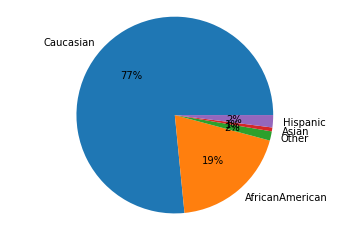

after merge values: 


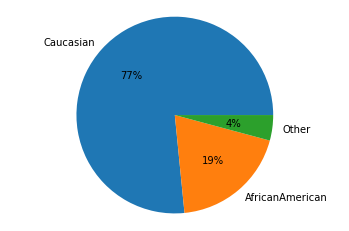

In [4]:
print("before merge values: ")
# Extract the column values and labels
values = df['race'].value_counts(sort=False) / df['race'].size
labels = df['race'].unique()

# Plotting the pie chart for 'race' column values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.axis('equal') 
plt.show()

df['race'] = df['race'].replace({'Hispanic':'Other', 'Asian':'Other'})

print("after merge values: ")
# Extract the column values and labels
values = df['race'].value_counts(sort=False) / df['race'].size
labels = df['race'].unique()

# Plotting the pie chart for 'race' column values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

#label encode the 'race' column
df['race'] = label_encode.fit_transform(df['race'])


<h1> Gender </h1>

Gender: 


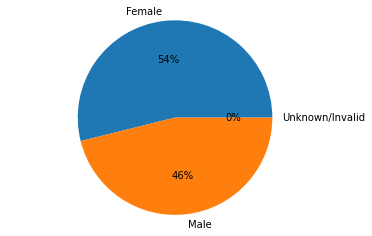

In [5]:
print("Gender: ")
# Extract the column values and labels
values = df['gender'].value_counts(sort=False) / df['gender'].size
labels = df['gender'].unique()

# Plotting the pie chart for 'race' column values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.axis('equal')  
plt.show()

#label encode the 'gender' column
df['gender'] = label_encode.fit_transform(df['gender'])


<h1>Age </h1>

befor merge: 
[10-20)     0.004753
[20-30)     0.015073
[30-40)     0.036185
[40-50)     0.094490
[50-60)     0.170285
[60-70)     0.222421
[70-80)     0.258085
[80-90)     0.170336
[90-100)    0.027710
[0-10)      0.000663
Name: age, dtype: float64


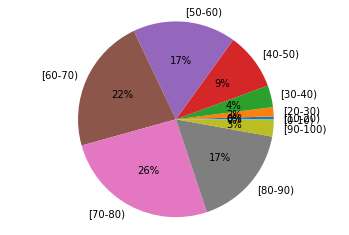

after merge: 
[30-40)    0.056673
[40-50)    0.094490
[50-60)    0.170285
[60-70)    0.222421
[70-80)    0.258085
[80-90)    0.198046
Name: age, dtype: float64


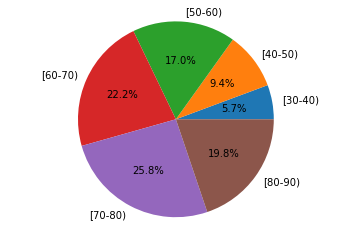

In [6]:
print("befor merge: ")
# Extract the column values and labels
values = df['age'].value_counts(sort=False) / df['age'].size
labels = df['age'].unique()
print(values)


# Plotting the pie chart for 'race' column values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular chart
plt.show()

# Merge some categoris
df['age'] = df['age'].replace({'[0-10)':'[30-40)',
                                         '[10-20)':'[30-40)',
                                         '[20-30)':'[30-40)',
                                         '[90-100)' : '[80-90)'})

print("after merge: ")
# Extract the column values and labels
values = df['age'].value_counts(sort=False) / df['age'].size
labels = df['age'].unique()
print(values)

# Plotting the pie chart for 'race' column values
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.axis('equal')  # Equal aspect ratio ensures a circular chart
plt.show()

#label encode the 'age' column
df['age'] = label_encode.fit_transform(df['age'])


<h1>admission type id </h1>

befor merge: 
1    0.532141
2    0.178913
3    0.185553
6    0.052370
4    0.000102
5    0.047536
8    0.003182
7    0.000204
Name: admission_type_id, dtype: float64


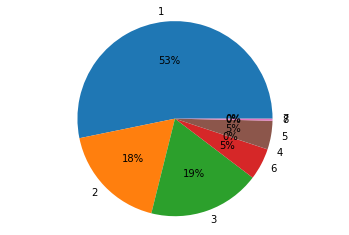

after merge: 
1    0.532141
2    0.178913
3    0.185553
6    0.055552
4    0.000102
5    0.047536
7    0.000204
Name: admission_type_id, dtype: float64


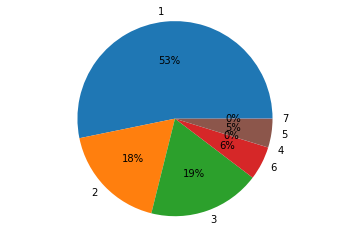

'Note: Again the id = 8 has low percentage what should we do with it?'

In [7]:
print("befor merge: ")
# Extract the column values and labels
values = df['admission_type_id'].value_counts(sort=False) / df['admission_type_id'].size
labels = df['admission_type_id'].unique()
print(values)


# Plotting the pie chart for 'race' column values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular chart
plt.show()

df['admission_type_id'] = df['admission_type_id'].replace({8:6,8:6})

print("after merge: ")
# Extract the column values and labels
values = df['admission_type_id'].value_counts(sort=False) / df['admission_type_id'].size
labels = df['admission_type_id'].unique()
print(values)


# Plotting the pie chart for 'race' column values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular chart
plt.show()

"""Note: Again the id = 8 has low percentage what should we do with it?"""

<h1>discharge disposition id</h1>

befor merge: 
1     0.587539
3     0.138333
6     0.128767
2     0.020897
5     0.011494
11    0.016379
7     0.006038
25    0.009597
10    0.000061
4     0.007710
14    0.003753
18    0.036960
8     0.001081
13    0.004039
12    0.000031
16    0.000112
17    0.000143
22    0.020091
23    0.004079
9     0.000214
20    0.000020
15    0.000643
24    0.000490
28    0.001397
19    0.000082
27    0.000051
Name: discharge_disposition_id, dtype: float64


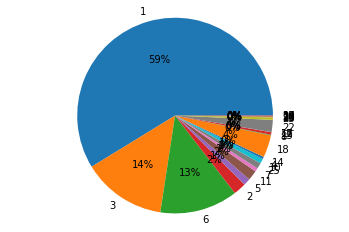

after merge: 
1    0.721508
2    0.231936
3    0.046556
Name: discharge_disposition_id, dtype: float64


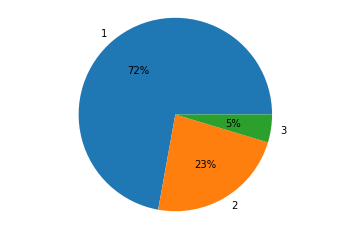

In [19]:
print("befor merge: ")
# Extract the column values and labels
values = df['discharge_disposition_id'].value_counts(sort=False) / df['discharge_disposition_id'].size
labels = df['discharge_disposition_id'].unique()
print(values)

# Plotting the pie chart for 'race' column values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular chart
plt.show()

# Merge all data to the three category 1: home 2:clinic 3:null
discharge_replace = {1:1,6:1,8:1,13:1 ,19:1, 18:3,25:3,26:3}
for num in discharge_df['discharge_disposition_id']:
    if num not in discharge_replace:
        discharge_replace[num] = 2  
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(discharge_replace)

print("after merge: ")
# Extract the column values and labels
values = df['discharge_disposition_id'].value_counts(sort=False) / df['discharge_disposition_id'].size
labels = df['discharge_disposition_id'].unique()
print(values)

# Plotting the pie chart for 'race' column values
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular chart
plt.show()


<h1>4- Merge data</h1>

In [9]:
des_df = pd.read_csv('IDs_mapping.csv')

admission_type_df = des_df.iloc[0:8, 0:2] #['admission_type_id','description']
discharge_df = des_df.iloc[:, 2:4]#['discharge_disposition_id','description.1']
admission_source_df = des_df.iloc[0:25, 4:] #['admission_source_id','description.2']

# Data analysis to gain insights into the dataset
display(admission_type_df)
display(discharge_df)
display(admission_source_df)


# discharge_replace = {1:1,6:1,8:1,13:1,19:1}
# for num in discharge_df['discharge_disposition_id']:
#     if num not in discharge_replace:
#         discharge_replace[num] = 2  # You can set a default value or None

# df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(discharge_replace)
# df = df.replace({"NO":0,"<30":1,">30":0})

,admission_type_id,description
0,1.0,Emergency
1,2.0,Urgent
2,3.0,Elective
3,4.0,Newborn
4,5.0,Not Available
5,6.0,NaN
6,7.0,Trauma Center
7,8.0,Not Mapped


,discharge_disposition_id,description.1
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


,admission_source_id,description.2
0,1.0,Physician Referral
1,2.0,Clinic Referral
2,3.0,HMO Referral
3,4.0,Transfer from a hospital
4,5.0,Transfer from a Skilled Nursing Facility (SNF)
5,6.0,Transfer from another health care facility
6,7.0,Emergency Room
7,8.0,Court/Law Enforcement
8,9.0,Not Available
9,10.0,Transfer from critial access hospital


<h1>4- Split dataset</h1>

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

df_train = df.iloc[:100, :]
y_train = df.iloc[:100, -1]
# df_train,df_test = train_test_split(df,test_size = 0.1,random_state=50)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=50)


<h1>5- Decision tree models</h1>

In [11]:
class Node(object):
    def __init__(self, value, node_amounts, children, is_leaf=False):
        self.children = children
        self.is_leaf = is_leaf
        self.value = value
        self.node_amounts = node_amounts




def calculate_info(y=y_train):
    # count the repetition of each unique value
    count_unique_values = y.value_counts()

    # calculate probability of each unique value
    P_c = count_unique_values.values / len(y)
    info_s = -np.sum(P_c * np.log2(P_c))

    return info_s


def calculate_info_feature(feature, target):
    #   1- calculate info(S) according to the feature value
    column_group = [feature, target]
    # count the repetition of each unique value
    count_feature_unique_values = df_train[feature].value_counts().sort_index()  # for the feature column
    count_unique_values = df_train[column_group].value_counts()  # for feature and target column simultaneously

    """
    * calculate probabilty (P_c) According to each unique value of feature column

    * .index.get_level_values(feature) retrieves an array of feature values that
    each feature value is repeated based on the different unique target values it took
    """
    P_cs = (count_unique_values / count_unique_values.index.get_level_values(feature).map(count_feature_unique_values))
    info_s_is = P_cs.groupby(feature).apply(lambda x: -np.sum(x * np.log2(x)))

    #     2- calculate info_A(S)
    info_A = np.sum((count_feature_unique_values / len(df_train[feature]) * info_s_is))

    return info_A


def calculate_gain(feature, target='readmitted'):
    return calculate_info() - calculate_info_feature(feature, target)


# class Tree:
#     def __init__():
#         pass

# return the name of the best feature for the nex_node
def next_node(dataframe: pd.DataFrame) -> str:
    gain = 0
    max_gain = 0
    best_column = None
    for i in dataframe.columns.values:
        gain = calculate_gain(i)
        if (gain > max_gain):
            max_gain = gain
            best_column = i
    return best_column


# Checks whether a node is a leaf or not
def is_leaf(dataframe: pd.DataFrame, target: str = 'readmitted') -> bool:
    #     if all remain target values are the same
    if dataframe[target].nunique() == 1:
        return True
    #     if there is no more feature column to check. (==1) is for the target column
    elif (len(dataframe.columns) == 1):
        return True
    else:
        return False


# return appropriate value for a leaf
def leaf_value(target_column: pd.Series) -> int:
    return target_column.value_counts().idxmax()


def generateTree():
    dataframe_copy = df_train.copy()

    question = next_node(dataframe_copy[dataframe_copy.columns[~dataframe_copy.columns.isin([target_column])]])
    question_node = Node(value=question, node_amounts=dataframe_copy[question].unique(), children=dict())
    root = question_node

    ID3(root, dataframe_copy)
    return root


def ID3(node, df):
    for node_amount in node.node_amounts:
        temp_dataframe = df.loc[df[node.value] == node_amount]
        #     if all remain target values are the same
        #     or
        #     if there is no more feature column to check. (==1) is for the target column

        if temp_dataframe[target_column].nunique() == 1 or (len(temp_dataframe.columns) == 1):
            new_child = Node(is_leaf=True, value=leaf_value(temp_dataframe[target_column]), node_amounts=[],
                              children=dict())
            node.children[node_amount] = new_child

            if node_amount == node.node_amounts[-1]:
                return


        else:
            question = next_node(
                temp_dataframe[temp_dataframe.columns[~temp_dataframe.columns.isin([target_column, node.value])]])
            question_node = Node(value=question, node_amounts=temp_dataframe[question].unique(), children=dict())
            node.children[node_amount] = question_node


            temp_dataframe_copy = temp_dataframe.copy()
            temp_dataframe_copy = temp_dataframe_copy.drop(node.value, axis=1)

            ID3(question_node, temp_dataframe_copy)
    return

# call after generating the tree
def iterate_tree(node: Node, example):
    # start with the root of the tree
    while not node.is_leaf:
        # find the question that is asked in this layer
        question = node.value
        # iterate through all branches of the node
        for amount in node.node_amounts:
            # find the branch that the example belongs to
            if example[question] == amount:
                # move to the child
                node = node.children[amount]
                break
            elif amount == node.node_amounts[-1]:
                print(f'couldn\'t find the class of the example ---> stopped at {node.value} ')
                return -1
    if node.is_leaf:
        # return the class of the leaf
        return node.value

    return -1

In [12]:
root = generateTree()
for i in range(len(df_train)):

    example = dict()
    for col in df_train:
        example[col] = df_train.iloc[i][col]

    # print(example)
    tree_res = iterate_tree(root, example)

    df_res = df_train.iloc[i][target_column]
    if(tree_res != tree_res):
        print(f'i = {i}')

In [13]:
info_s = calculate_info() 
# z = X['race'].value_counts()
# print(z)
# temp = ['race','gender']
# cn = X[temp].value_counts()
# # print(cn.groupby('race').sum())
# print(cn/cn.index.get_level_values('race').map(z))


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV


# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier on the training set
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Define the hyperparameters you want to tune
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculate the accuracy of the best estimator
accuracy = best_clf.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

ValueError: could not convert string to float: 'V57'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the random forest classifier on the training set
rf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)